**Names of all group members:**
Oscar Romero Alarcon, Angus Martin, Konrad Ochedzan, Christopher Yuan



---

# Question 1

First we create the data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(213742069)  # for reproducibility

# simulate explanatory variables x

m, n = 20000, 10000
total_samples = m + n

x1 = np.random.uniform(18, 80, total_samples)
x2 = np.random.uniform(1, 15, total_samples)
x3 = np.random.choice([0, 1], total_samples, p=[0.9, 0.1])

# Combine the simulated vectors into an array
x_total = np.column_stack((x1, x2, x3))

## Part a

In [ ]:
mean_x1 = np.mean(x_total[:m, 0])
std_x1 = np.std(x_total[:m, 0])

mean_x2 = np.mean(x_total[:m, 1])
std_x2 = np.std(x_total[:m, 1])

mean_x3 = np.mean(x_total[:m, 2])
std_x3 = np.std(x_total[:m, 2])

print(f'Mean and standard deviation of x1: {mean_x1:.4f}, {std_x1:.4f}')
print(f'Mean and standard deviation of x2: {mean_x2:.4f}, {std_x2:.4f}')
print(f'Mean and standard deviation of x3: {mean_x3:.4f}, {std_x3:.4f}')

Mean and standard deviation of x1: 48.9364, 17.9877
Mean and standard deviation of x2: 8.0028, 4.0340
Mean and standard deviation of x3: 0.0970, 0.2960


## Part b

Possible additional features that could be collected for consumer loans include:

Marriage status; Number of children; Education level; Credit history; Geography; Size of loan requested; Gender; Country of origin; History of defaults.

# Question 2

In [ ]:
# Building the datasets:

ksi = np.random.uniform(0,1, total_samples)

sigmoid = lambda x: 1. / (1. + np.exp(-x))

is_x1_smaller_than25 = [1 if x1[i] <25 else 0 for i in range(total_samples)]
is_x1_bigger_than75 = [1 if x1[i] >75 else 0 for i in range(total_samples)]

p1 = [sigmoid(13.3 - 0.33*x1[i]+3.5*x2[i]-3*x3[i]) for i in range(total_samples)]
p2 = [sigmoid(5-10*(is_x1_smaller_than25[i]+is_x1_bigger_than75[i])+1.1*x2[i]-x3[i]) for i in range(total_samples)]

# build the first dataset
y1 = np.array([1 if ksi[i] < p1[i] else 0 for i in range(total_samples)])

# build the second dataset
y2 = np.array([1 if ksi[i] < p2[i] else 0 for i in range(total_samples)])

## Part a
We develop and train logistic regression models to run on the datasets.

In [ ]:
# Exercise 2. a)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

x_train = x_total[:m]
y1_train = y1[:m]
y2_train = y2[:m]
x_test = x_total[m:]
y1_test = y1[m:]
y2_test = y2[m:]

# "model = LogisticRegression().fit(X_data, Y_data)" fits a model
# "pred_X = model.predict_proba(X)" evaluates the model
# (note that it outputs both P(Y=0|X) and P(Y=1|X))
# "log_loss(Y, pred_X)" evaluates the negative conditional log likelihood (also called cross-entropy loss)

# Fit the models on both datasets

lr_model1 = LogisticRegression().fit(x_train, y1_train)
lr_model2 = LogisticRegression().fit(x_train, y2_train)

# Calculate cross-entropy loss on both datasets for train and test
# dataset 1
phat1_lr_train = lr_model1.predict_proba(x_train)[:,1] # We select the second column for the output of P(Y=1|X)
phat1_lr_test = lr_model1.predict_proba(x_test)[:,1]

# dataset 2
phat2_lr_train = lr_model2.predict_proba(x_train)[:,1]
phat2_lr_test = lr_model2.predict_proba(x_test)[:,1]

cross_entropy_loss1_train = log_loss(y1_train, phat1_lr_train)
cross_entropy_loss1_test = log_loss(y1_test, phat1_lr_test)
cross_entropy_loss2_train = log_loss(y2_train, phat2_lr_train)
cross_entropy_loss2_test = log_loss(y2_test, phat2_lr_test)

print("Cross-entropy loss for model 1 on train data:", cross_entropy_loss1_train)
print("Cross-entropy loss for model 1 on test data:", cross_entropy_loss1_test)
print("Cross-entropy loss for model 2 on train data:", cross_entropy_loss2_train)
print("Cross-entropy loss for model 2 on test data:", cross_entropy_loss2_test)


Cross-entropy loss for model 1 on train data: 0.03462670862287481
Cross-entropy loss for model 1 on test data: 0.034726280704432365
Cross-entropy loss for model 2 on train data: 0.15234436499937082
Cross-entropy loss for model 2 on test data: 0.15449337425919724


## Part b
Here we develop a SVM to model the datasets. We start by normalizing the data with respect to the standard deviation of the training data. Importantly, both the test data and training data are normalized by the same scalar.

In [ ]:
# Exercise 2. b)
# Calculate normalized data

def normalize(X, m):
    training_data = X[:m]
    training_stds = np.std(training_data, axis=0)

    # We use only the statistics from the training data to normalize the dataset
    normalized_X = X / training_stds
    return normalized_X

x_bar = normalize(x_total, m)
normalised_x_train = x_bar[:m]
normalised_x_test = x_bar[m:]

In [ ]:
# Exercise 2.b) (i) and (ii)
from sklearn.svm import SVC

regularization_param = 5/(2*m)

C = 1/(2*regularization_param*m)

# "model = SVC(kernel='rbf', gamma=GAMMA, C=C, probability=True)" creates
# a model with kernel exp(-GAMMA \|x-x'\|_2^2) and regul. parameter C (note the relation between C and the parameter lambda from the lecture).
# "probability=True" enables the option "model.predict_proba(X)" to predict probabilities from the regression function \hat{f}^{svm}.
# "model.fit(X, Y)" optimizes the model parameters (using hinge loss)

# Fit the models for both datasets (this can take up to 60 seconds with SVC)

# Fit the SVM model for the first dataset
svm_model1 = SVC(kernel='rbf', gamma=1/10, C=C, probability=True)
svm_model1.fit(normalised_x_train, y1_train)

# Fit the SVM model for the second dataset
svm_model2 = SVC(kernel='rbf', gamma=1/10, probability=True)
svm_model2.fit(normalised_x_train, y2_train)


SVC(gamma=0.1, probability=True)

In [ ]:
# Exercise 2.b (iii)
# "model.predict_proba(X)" predicts probabilities from features (note that it outputs both P(Y=0|X) and P(Y=1|X))

# Calculate cross-entropy loss on both datasets for train and test
# dataset 1
phat1_svc_train = svm_model1.predict_proba(normalised_x_train)[:,1]
phat1_svc_test = svm_model1.predict_proba(normalised_x_test)[:,1]

# dataset 2
phat2_svc_train = svm_model2.predict_proba(normalised_x_train)[:,1]
phat2_svc_test = svm_model2.predict_proba(normalised_x_test)[:,1]

cross_entropy_loss_svm1_train = log_loss(y1_train, phat1_svc_train)
cross_entropy_loss_svm1_test = log_loss(y1_test, phat1_svc_test)
cross_entropy_loss_svm2_train = log_loss(y2_train, phat2_svc_train)
cross_entropy_loss_svm2_test = log_loss(y2_test, phat2_svc_test)

print("Cross-entropy loss for model svm 1 on train data:", cross_entropy_loss_svm1_train)
print("Cross-entropy loss for model svm 1 on test data:", cross_entropy_loss_svm1_test)
print("Cross-entropy loss for model svm 2 on train data:", cross_entropy_loss_svm2_train)
print("Cross-entropy loss for model svm 2 on test data:", cross_entropy_loss_svm2_test)


Cross-entropy loss for model svm 1 on train data: 0.03639144149632983
Cross-entropy loss for model svm 1 on test data: 0.036203147867896426
Cross-entropy loss for model svm 2 on train data: 0.06304663589972634
Cross-entropy loss for model svm 2 on test data: 0.06397620006038653


## Part c
Here we examine the FDR/TPR-curves and AUC from the test data for the models.

In [ ]:
# Exercise 2.c
# To calculate the curves, it is fine to take 100 threshold values c, i.e.,
ths = np.linspace(0, 1, 100)

# To approximately calculate the AUC, it is fine to simply use Riemann sums.
# This means, if you have 100 (a_i, b_i) pairs for the curves, a_1 <= a_2 <= ...
# then you may simply use the sum
# sum_{i=1}^99 (b_i + b_{i+1})/2 * (a_{i+1}-a_i)
# as the approximation of the integral (or AUC)


# first data set & logistic regression:
# (the code should be reusable for all cases, only exchanging datasets and predicted probabilities depending on the model)

# Calculate positives (only depending on the dataset)
positives = lambda y: np.sum(y)

# Calculate true positives for all threshold values
def TP(y, phat, threshold):
    y_preds = (phat > threshold).astype(int)
    tp = len(np.where((y == 1) & (y_preds == 1))[0])
    return tp

# Calculate false positives for all threshold values
def FP(y, phat, threshold):
    y_preds = (phat > threshold).astype(int)
    fp = len(np.where((y == 0) & (y_preds == 1))[0])
    return fp

# Calculate FDR and TPR rate (points on the FDR/TPR curve) and the AUC
def FDR(y, phat, thresholds):
    fdrs = []
    for threshold in thresholds:
        fp = FP(y, phat, threshold)
        tp = TP(y, phat, threshold)
        fdr = 0
        if (fp + tp) > 0:
            fdr = fp / (fp + tp)
        fdrs.append(fdr)
    return fdrs

def TPR(y, phat, thresholds):
    tprs = []
    for threshold in thresholds:
        tp = TP(y, phat, threshold)
        p = positives(y)
        tpr = 0
        if p > 0:
            tpr = tp / p
        tprs.append(tpr)
    return tprs

# AUC using the trapezoid rule for the Rieman sum
def auc_trap(y, x):
    auc = 0
    M = len(x)
    for i in range(M - 1):
        auc -= (x[i + 1] - x[i]) * (y[i] + y[i + 1]) / 2
    return auc

AUC for Logistic regression on dataset 1:  0.0003130122814938517
AUC for Logistic regression on dataset 2:  0.008098909519349854
AUC for RKHS regression on dataset 1:  0.0003243760079994579
AUC for RKHS regression on dataset 2:  0.0008647747203409825


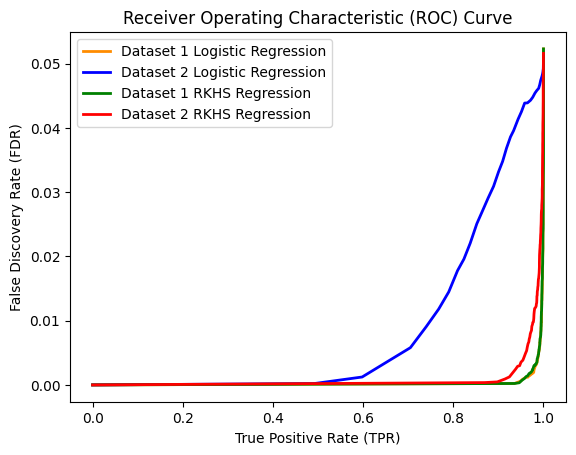

In [ ]:
# Logistic regression curves
# Dataset 1
fdr_lr1 = FDR(y1_test, phat1_lr_test, ths)
tpr_lr1 = TPR(y1_test, phat1_lr_test, ths)
auc_lr1 = auc_trap(fdr_lr1, tpr_lr1)
print("AUC for Logistic regression on dataset 1: ", auc_lr1)

# Dataset2
fdr_lr2 = FDR(y2_test, phat2_lr_test, ths)
tpr_lr2 = TPR(y2_test, phat2_lr_test, ths)
auc_lr2 = auc_trap(fdr_lr2, tpr_lr2)
print("AUC for Logistic regression on dataset 2: ", auc_lr2)

# RKHS regression curves
# Dataset 1
fdr_svc1 = FDR(y1_test, phat1_svc_test, ths)
tpr_svc1 = TPR(y1_test, phat1_svc_test, ths)
auc_svc1 = auc_trap(fdr_svc1, tpr_svc1)
print("AUC for RKHS regression on dataset 1: ", auc_svc1)

# Dataset2
fdr_svc2 = FDR(y2_test, phat2_svc_test, ths)
tpr_svc2 = TPR(y2_test, phat2_svc_test, ths)
auc_svc2 = auc_trap(fdr_svc2, tpr_svc2)
print("AUC for RKHS regression on dataset 2: ", auc_svc2)

# Plot ROC curves
plt.figure()
plt.plot(tpr_lr1, fdr_lr1, color='darkorange', lw=2, label=f'Dataset 1 Logistic Regression')
plt.plot(tpr_lr2, fdr_lr2, color='blue', lw=2, label=f'Dataset 2 Logistic Regression')
plt.plot(tpr_svc1, fdr_svc1, color='green', lw=2, label=f'Dataset 1 RKHS Regression ')
plt.plot(tpr_svc2, fdr_svc2, color='red', lw=2, label=f'Dataset 2 RKHS Regression ')

plt.xlabel('True Positive Rate (TPR)')
plt.ylabel('False Discovery Rate (FDR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='upper left')
plt.show()

In our case we are targetting an AUC near $0$ as this represents a model that maximizes TPR (correctly identifying responsible loanees) while discriminating for risky candidates. This enables the firm issuing the loans to reach the widest pool possible of recipients while mitigating exposure to delinquencies. To this extent we see that the second dataset seems to be trickier to model, while both models perform neck-and-neck on dataset one. Despite this, the RKHS SVM handles this more complex task much better, as compared to the simple logistic regression model.

# Exercise 3
In this exercise we evaluate the models developed above to find “good investment opportunities” in the test data set based on the features $x^i$. In particular we screen a number of sample loan applicants using the selection criterion of the (estimated) probability of the loan being paid back exceeding $95\%$. We additionally compare these two models to a baseline where all applicants are accepted, but charged a greater interest rate.

In [ ]:
# Exercise 3.
# Set model parameters and define matrix D
k = 50000
# Construct (n x 50000) Unif r.v.
tsi = np.random.uniform(0,1, (n, k))
p2_test = np.array(p2[m:]).reshape(n, 1)
# Assign 1 if tsi <=p(x_i), 0 otherwise
D = (tsi <= p2_test).astype(int)

loan = 1000
# Different interest rates per strategy
interest_rates = np.array([0.055, 0.01, 0.01])
#Different probability thresholds for the 2nd and 3rd strategies (log and svm)
awarded_threshold = np.array([0.95, 0.95])

In [ ]:
def plot_results(balance, strategy):
  # Plot histogram of profits and losses
  plt.figure(figsize=(10, 6))
  plt.hist(balance, bins=25, edgecolor='black')
  plt.xlabel('Portfolio balance')
  plt.ylabel('Frequency')
  plt.title(f"Strategy {strategy} P&L histogram against different Market Scenarios")
  plt.show()

  # Calculate expected profit and losses and 95%-VaR
  expected_profit_loss = np.mean(balance)
  # We plot the VaR as a positive value (representing the loss), as it is normally refered in the literature
  var_95_percent = -np.percentile(balance, 5)
  print(f"Strategy {strategy} results:")
  print('Strategy expected Profit/Loss:', expected_profit_loss)
  print('95%-VaR (Value at Risk):', var_95_percent)

[9473 9514 9463 ... 9482 9475 9502]


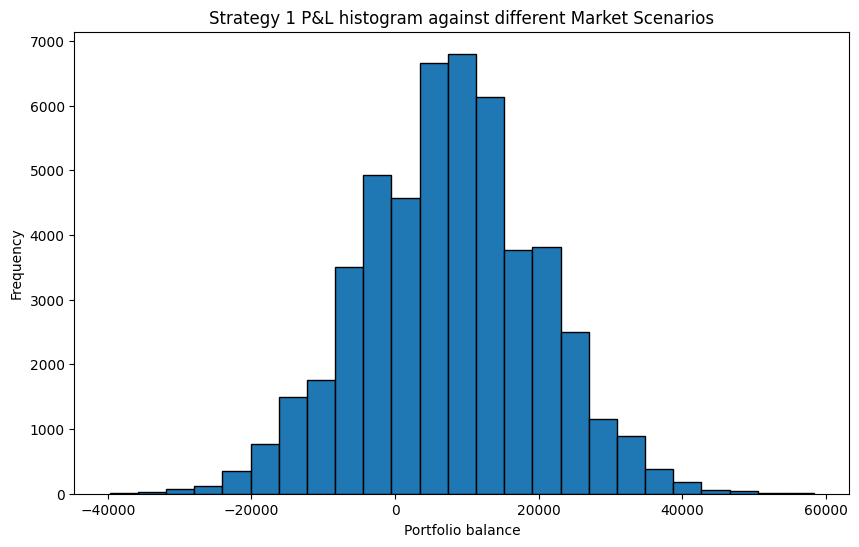

Strategy 1 results:
Strategy expected Profit/Loss: 7649.9888
95%-VaR (Value at Risk): 12315.0


In [ ]:
# Strategy 1:
# Define Portfolio and possible outcomes for this portfolio using matrix D
# Sum the amount of payers by columns
payers = np.sum(D, axis = 0)
print(payers)
# n being the column size per scenario
delinquents = n - payers
scenario1_balance = payers * (loan * interest_rates[0]) - delinquents * loan

# Plot results
plot_results(scenario1_balance, 1)

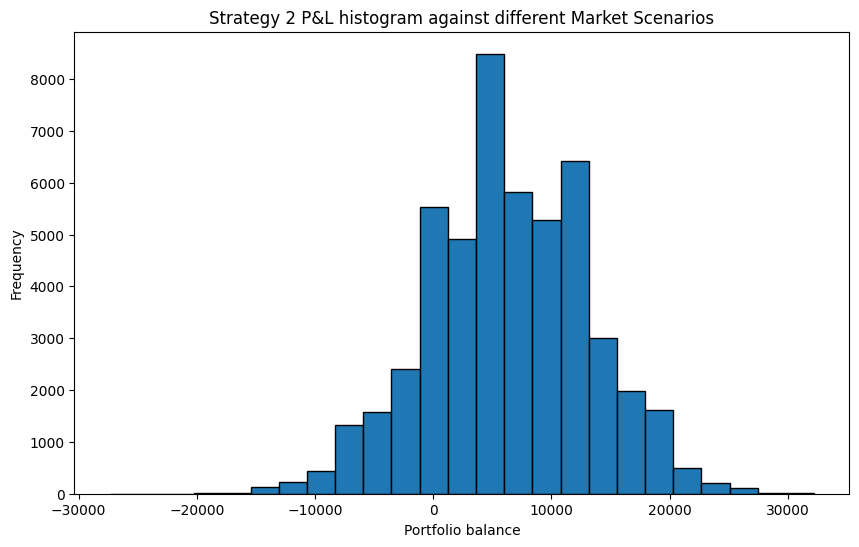

Strategy 2 results:
Strategy expected Profit/Loss: 6370.2822
95%-VaR (Value at Risk): 5150.0


In [ ]:
def portfolio(borrowers_ind, D, strategy):
  # From the whole scenario, filter the ones that received the credit
  D_adjusted = D[borrowers_ind]
  # Sum the amount of payers for each scenario
  payers = np.sum(D_adjusted, axis=0)
  dim_borr = len(borrowers_ind)
  delinquents = dim_borr - payers
  balance = payers * loan * interest_rates[strategy-1] - delinquents * loan
  return balance


# Strategy 2:
p2_log_pred = lr_model2.predict_proba(x_total[m:])[:, 1]
# We get the indices of the persons that will receive the credit
borrowers_ind = np.where(p2_log_pred >= awarded_threshold[0])[0]
scenario2_balance = portfolio(borrowers_ind, D, 2)

# Plot results
plot_results(scenario2_balance, 2)

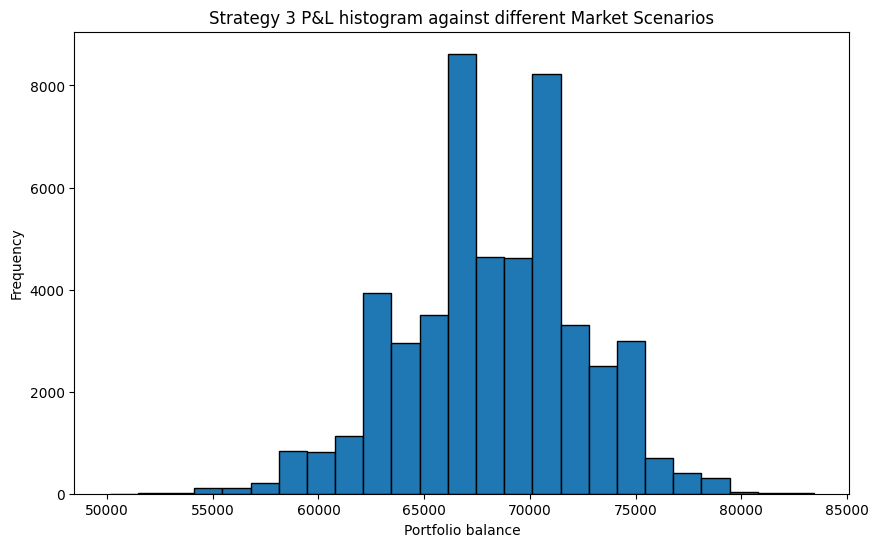

Strategy 3 results:
Strategy expected Profit/Loss: 68266.2054
95%-VaR (Value at Risk): -61230.0


In [ ]:
# Strategy 3:
p2_svm_pred = svm_model2.predict_proba(normalised_x_test)[:, 1]
# We get the indices of the persons that will receive the credit
borrowers_ind = np.where(p2_svm_pred >= awarded_threshold[1])[0]
scenario3_balance = portfolio(borrowers_ind, D, 2)

# Plot results
plot_results(scenario3_balance, 3)

We see that Strategy 3 is far-and-away the most profitable strategy, as well as the least risky. Strategy 1 is second in terms of P&L, however its wide spread makes it less desirable from a risk-management perspective. Overall these results are in line with what we me expect, as they demonstrate that when applied correctly credit modelling can boost the return for the company while reducing exposure. Moreover, in the case of the SVM model, correctly identifying high-value applicants enabled the company to offer loans at a more competitive rate (only $1\%$) while still ensuring a profit. In a competitve market this benefits both the client and firm as it provides the bank with a pricing advantage over its competitors.